In [1]:
#Loading Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
#Defining the categories
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
 'talk.politics.misc', 'talk.religion.misc']

In [4]:
#Training Data on these categories
train = fetch_20newsgroups(subset = 'train',categories = categories)
#Training Data on these categories
test = fetch_20newsgroups(subset = 'test',categories = categories)

#printing Training data
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [9]:
pip install tfidf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for tfidf: filename=tfidf-0.0.6-py3-none-any.whl size=2411 sha256=ecbdc3b1b6ffe9a9edcf3f11be48e60cb0872992b963f33659e756752c374252
  Stored in directory: /root/.cache/pip/wheels/8b/72/4a/8d8079ffe00a3cae49d05cb28fa94f318ae97276a888e28a68
  Created wheel for etl-utils: filename=etl_utils-0.1.11-py3-none-any.whl size=21643 sha256=bdb052e95f8f74f447eccda05f17298cf54419957bbfce794d5b050a06dbda12
  Stored in directory: /root/.cache/pip/wheels/f4/d1/fa/7f8f0b3bdcced0f1205bac981c449925992e5c785bfcd15dde
  Created wheel for progressbar: filename=progressbar-2.2-py3-none-any.whl size=6462 sha256=b87da725c85187cb8fd3711c08ca9428bc1a5ab24d649ee3eef15737f8ac0e62
  Stored in directory: /root/.cache/pip/wheels/ed/19/57/6fd2895583ffe9b5663099963c99f4a3e3d226c6d8c1c718c0
  Created wheel for pysingleton: filename=pysingleton-0.2.1-py3-none-any.whl size=2199 sha256=91ba07aeb1c762b5c90f437d0

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
#CReating model based on multinomial naive bayes
model = make_pipeline( TfidfVectorizer(),MultinomialNB())

#Training model with Train datam
model.fit(train.data,train.target)
#Creating labels for test data
labels = model.predict(test.data)

Text(89.17999999999999, 0.5, 'Predicted Label')

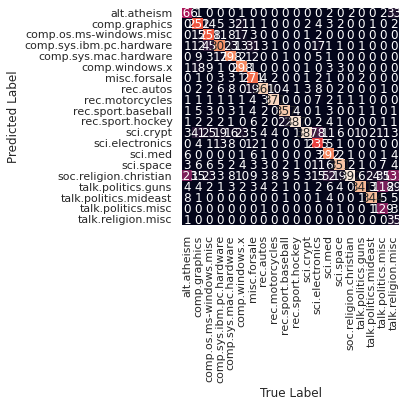

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square = True, annot = True, fmt ='d', cbar = False, xticklabels=train.target_names, yticklabels=train.target_names )
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [17]:
#Predicting category on data based on new training model
def predict_category(s, train=train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [18]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [22]:
predict_category('International Space Station')

'sci.space'

In [23]:
predict_category('Mercedes')

'rec.autos'

In [25]:
predict_category('Indian President')

'talk.politics.misc'